In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'../data/tokenized.csv')
df_test = pd.read_csv(r'../data/test_tokenized.csv')

In [11]:
df_test

,post,gender,tokenized,cleaned,cluster
0,perfect epitome of demagogue ..jus too senitiv...,1,"['perfect', 'epitome', 'demagogue', 'jus', 'se...","['perfect', 'epitome', 'demagogue', 'ju', 'sen...",5
1,Autistic Rights are Disability Rights are Huma...,1,"['autistic', 'right', 'disability', 'right', '...","['autistic', 'right', 'disability', 'right', '...",7
2,Good news for U.S. territories; Del. Donna M. ...,1,"['good', 'news', 'u', 'territories', 'del', 'd...","['good', 'news', 'territories', 'del', 'donna'...",6
3,The weather in this part of the globe is once ...,1,"['weather', 'part', 'globe', 'change', 'slight...","['weather', 'globe', 'change', 'slight', 'chil...",2
4,I was the first one to arrive at the station. ...,1,"['first', 'one', 'arrive', 'station', 'sit', '...","['arrive', 'station', 'sit', 'bench', 'wait', ...",2
...,...,...,...,...,...
639,"Sorry, Charlie\n\nUntil recently, it was assu...",0,"['sorry', 'charlie', 'recently', 'assume', 'ch...","['sorry', 'charlie', 'recently', 'assume', 'ch...",6
640,Feel Good….!!! :) Recently i have seen a video...,0,"['feel', 'good…', 'recently', 'see', 'video', ...","['feel', 'good', 'recently', 'video', 'abt', '...",5
641,"I've been working on some new material. "" When...",0,"['ive', 'work', 'new', 'material', 'youre', 'b...","['work', 'new', 'material', 'blind', 'sen', 's...",2
642,vasoooool raani :P.. finally here goes a testi...,0,"['vasoooool', 'raani', 'p', 'finally', 'go', '...","['vasoooool', 'raani', 'finally', 'testimonial...",5


In [14]:
from ast import literal_eval

df['tokenized'] = df['tokenized'].apply(literal_eval)
df_test['tokenized'] = df_test['tokenized'].apply(literal_eval)

### Load model

In [3]:
import torch
import torch.nn.functional as nn
from transformers_interpret import SequenceClassificationExplainer
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the fine-tuned BERT model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased", do_lower_case=True)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
finetuned_path = '../models/bert/own_script/epoch-4.model'
model.load_state_dict(torch.load(finetuned_path, map_location=torch.device('cpu')))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifi

<All keys matched successfully>

In [5]:
def predict(text):
    inputs = tokenizer(text, add_special_tokens = True, max_length = 512, 
                      truncation = True, padding = True, return_tensors='pt')
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits = outputs.logits
    pred = torch.argmax(logits, dim=-1).detach().numpy()[0] 
    prob = nn.softmax(logits, dim=-1).cpu().detach().numpy()[0]
    return pred

In [6]:
preds = []
for post in df.post:
    preds.append(predict(post))

In [7]:
preds_test = []
for post in df_test.post:
    preds_test.append(predict(post))

In [12]:
df['pred'] = preds
df_test['pred'] = preds_test
df

,post,gender,tokenized,pred
0,Long time no see. Like always I was rewriting...,0,"['long', 'time', 'see', 'like', 'always', 'rew...",0
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,0,"['guest', 'demo', 'eric', 'iverson', '’', 'itt...",0
2,Who moved my Cheese??? The world has been de...,0,"['move', 'cheese', 'world', 'develop', 'area',...",0
3,Yesterday I attended a biweekly meeting of an...,0,"['yesterday', 'attend', 'biweekly', 'meeting',...",0
4,Liam is nothing like Natalie. Natalie never w...,1,"['liam', 'nothing', 'like', 'natalie', 'natali...",1
...,...,...,...,...
3213,It was a scavenger style race with checkpoints...,0,"['scavenger', 'style', 'race', 'checkpoint', '...",0
3214,Finally! I got a full day's work done. Almost ...,1,"['finally', 'get', 'full', 'day', 'work', 'do'...",1
3215,"At the height of laughter, the universe is flu...",0,"['height', 'laughter', 'universe', 'flung', 'k...",0
3216,"I like birds, especially woodpeckers and MOST ...",0,"['like', 'bird', 'especially', 'woodpecker', '...",0


Check distribution of post length

In [15]:
post_lengths = df['post'].str.split().str.len()

print("Minimum post length: " + str(min(post_lengths)))
print("Maximum post length: " + str(max(post_lengths)))
print("Average post length: " + str(np.mean(post_lengths)))
print("Median:              " + str(np.median(post_lengths)))

Minimum post length: 11
Maximum post length: 6148
Average post length: 420.16376631448105
Median:              194.0


In [16]:
# most frequent post length
counts = np.bincount(post_lengths)
print("Most frequent post length: " + str(np.argmax(counts)))

Most frequent post length: 90


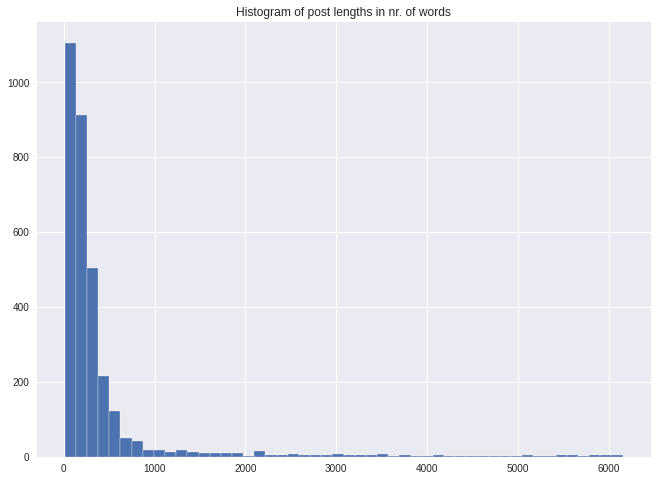

In [17]:
plt.figure(figsize=(11,8))
plt.style.use('seaborn')
plt.hist(post_lengths, bins=50)
plt.title("Histogram of post lengths in nr. of words")
plt.show()

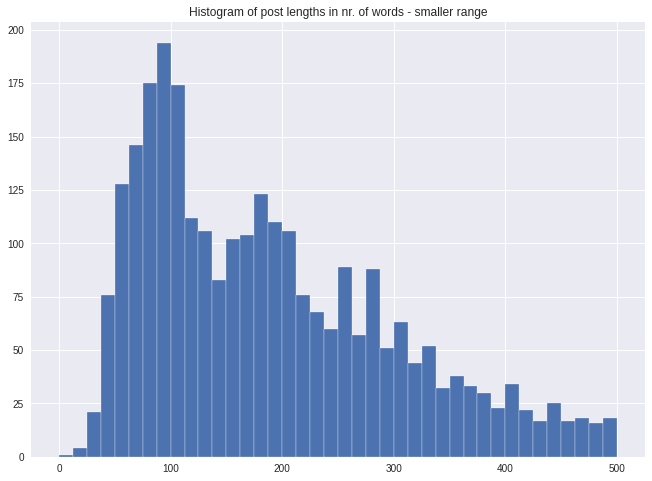

In [18]:
plt.figure(figsize=(11,8))
plt.style.use('seaborn')
plt.hist(post_lengths, bins=40, range=[0, 500])
plt.title("Histogram of post lengths in nr. of words - smaller range")
plt.show()

## Topic modeling

In [20]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Create a dictionary representation of the documents.
male_preds = df[df.pred == 0]
dictionary = Dictionary(male_preds.tokenized)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

In [21]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in male_preds.tokenized]

In [22]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 2179
Number of documents: 1673


In [23]:
import logging
import re

logging.basicConfig(filename='gensim.log', format='%(asctime)s:%(levelname)s:%(message)s', level=logging.INFO)

def parse_logfile():
    matcher = re.compile('(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity')
    likelihoods = []
    with open('gensim.log') as source:
        for line in source:
            match = matcher.search(line)
            if match:
                likelihoods.append(float(match.group(1)))
    return likelihoods

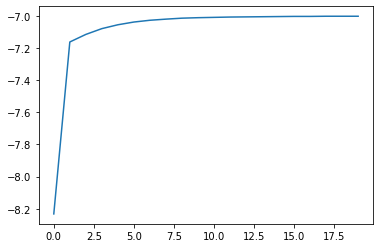

In [24]:
# Set training parameters.
num_topics = 5
passes = 20

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    alpha='auto',
    eta='auto',
    num_topics=num_topics,
    passes=passes,
    random_state=1
)

likelihoods = parse_logfile()
plt.plot(list(range(len(likelihoods))), likelihoods)

In [25]:
model.print_topics()

[(0,
  '0.011*"game" + 0.011*"’" + 0.009*"get" + 0.008*"like" + 0.008*"see" + 0.007*"make" + 0.007*"go" + 0.007*"new" + 0.007*"film" + 0.007*"play"'),
 (1,
  '0.031*"’" + 0.013*"“" + 0.012*"”" + 0.008*"say" + 0.007*"make" + 0.006*"new" + 0.006*"use" + 0.005*"would" + 0.005*"company" + 0.005*"year"'),
 (2,
  '0.010*"get" + 0.008*"make" + 0.008*"use" + 0.007*"like" + 0.007*"look" + 0.006*"work" + 0.006*"see" + 0.006*"take" + 0.006*"time" + 0.006*"go"'),
 (3,
  '0.014*"get" + 0.013*"go" + 0.011*"time" + 0.011*"like" + 0.010*"know" + 0.010*"say" + 0.009*"think" + 0.008*"u" + 0.008*"people" + 0.008*"day"'),
 (4,
  '0.009*"blog" + 0.009*"year" + 0.008*"time" + 0.008*"2010" + 0.007*"book" + 0.007*"think" + 0.007*"like" + 0.006*"work" + 0.006*"say" + 0.006*"show"')]

In [76]:
# TODO: Enter code here to train an LDA model and store it in a variable `model`
from gensim.models import LdaModel

# Set training parameters.
num_topics = 5
passes = 10

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    alpha='auto',
    eta='auto',
    num_topics=num_topics,
    passes=passes,
    random_state=1
)

model.print_topics()